# Artificial Neural Networks Final project
## DSTI S20 ANN Class
Classify digits for this more complicated version of MNIST dataset
28x28 greyscale images are flattened into a 784-elements array. The train.csv contains also the target as the last column.

In [2]:
# Import all required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


## Load Train and Test data

First load the training set and the test set, the train_data.csv has 12,000 rows and 785 columns with the last columns (785) containing the target. The test.csv has 50,000 rowms and 784 columns.

In [8]:
train = pd.read_csv('C:/Users/fbhug/OneDrive/Desktop/DSTIS20ANNCLASS/data/train_data.csv', header=None)
print(train.shape)
train.head()

(12000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.713940,0.950166,0.082491,0.473774,0.374250,0.605040,0.412975,0.044910,0.632922,0.833006,...,0.370060,0.231853,0.551300,0.269233,0.647563,0.280602,0.497715,0.556270,0.698295,5.0
1,0.207442,0.159942,0.052641,0.051342,0.009720,0.682703,0.774166,0.558285,0.005905,0.201606,...,0.315708,0.012937,0.300337,0.284532,0.135431,0.678037,0.494685,0.203191,0.391003,7.0
2,0.325839,0.056225,0.160836,0.759836,0.403398,0.187141,0.340320,0.775668,0.459065,0.921677,...,0.593142,0.505503,0.378750,0.087939,0.530516,0.888135,0.407788,0.627825,0.673938,7.0
3,0.456670,0.540038,0.424184,0.660162,0.091114,0.249477,0.309704,0.465830,0.828901,0.344942,...,0.207742,0.155203,0.178659,0.261624,0.682500,0.771541,0.893934,0.707141,0.606010,1.0
4,0.364102,0.175911,0.483085,0.126983,0.284549,0.419236,0.075535,0.466388,0.358588,0.124850,...,0.345253,0.829508,0.604404,0.017116,0.671998,0.683932,0.895201,0.796101,0.432795,8.0


In [9]:
test= pd.read_csv('C:/Users/fbhug/OneDrive/Desktop/DSTIS20ANNCLASS/data/test_data.csv', header=None)
print(test.shape)
test.head()

(50000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.923635,0.845687,0.392889,0.615869,0.874534,0.740285,0.866167,0.874884,0.798678,0.921411,...,0.319343,0.117923,0.534830,0.471488,0.533066,0.043630,0.180847,0.914436,0.208952,0.818082
1,0.007767,0.670740,0.951021,0.824375,0.094717,0.497067,0.114710,0.437907,0.960489,0.240704,...,0.517363,0.613867,0.707880,0.117110,0.418698,0.645694,0.927810,0.680603,0.676337,0.950921
2,0.358045,0.464620,0.437333,0.050389,0.077008,0.442392,0.918650,0.050119,0.192834,0.104782,...,0.724851,0.801276,0.479539,0.329358,0.792401,0.280922,0.271480,0.439076,0.304218,0.776752
3,0.529594,0.952398,0.106095,0.145126,0.848198,0.623113,0.987542,0.208150,0.786005,0.177162,...,0.070347,0.207519,0.516150,0.301316,0.444116,0.568434,0.720637,0.000732,0.298122,0.661337
4,0.615061,0.910934,0.610735,0.926151,0.166474,0.094271,0.172607,0.641545,0.529498,0.750550,...,0.445006,0.977408,0.975606,0.552509,0.170555,0.971848,0.432990,0.183389,0.035798,0.067085


We slice the dataset, X_train is all the pixel values except the last columns, y_train is only the last columns i.e targets digits

In [10]:
X_train = train.values[:, :-1].astype('float32') # all pixel values
y_train = train.values[:, -1].astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [11]:
X_train

array([[0.71393967, 0.9501659 , 0.08249079, ..., 0.49771526, 0.5562701 ,
        0.6982948 ],
       [0.2074419 , 0.15994205, 0.05264073, ..., 0.49468467, 0.20319134,
        0.3910032 ],
       [0.32583907, 0.05622495, 0.16083609, ..., 0.40778807, 0.6278255 ,
        0.6739378 ],
       ...,
       [0.20870872, 0.2914126 , 0.11379358, ..., 0.22988315, 0.34141657,
        0.7791225 ],
       [0.53324336, 0.9818542 , 0.9154577 , ..., 0.14704646, 0.7578512 ,
        0.10463694],
       [0.7691985 , 0.74592817, 0.93583935, ..., 0.5826297 , 0.06826721,
        0.4714569 ]], dtype=float32)

In [12]:
print(X_train.shape)

(12000, 784)


In [13]:
y_train

array([5, 7, 7, ..., 2, 2, 5])

In [14]:
X_test

array([[0.923635  , 0.8456874 , 0.39288923, ..., 0.9144356 , 0.20895223,
        0.8180819 ],
       [0.00776682, 0.6707405 , 0.95102143, ..., 0.6806027 , 0.67633706,
        0.9509205 ],
       [0.35804468, 0.4646199 , 0.43733254, ..., 0.43907633, 0.30421776,
        0.77675223],
       ...,
       [0.08001589, 0.6599201 , 0.07966129, ..., 0.8241416 , 0.97174627,
        0.76374   ],
       [0.6857226 , 0.06344529, 0.2195976 , ..., 0.6751272 , 0.6782646 ,
        0.7046526 ],
       [0.9311438 , 0.20411345, 0.2844703 , ..., 0.70667714, 0.4701938 ,
        0.7886062 ]], dtype=float32)

In [15]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

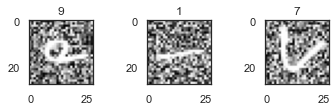

In [16]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

Reshape the dataset so that it is suitable for use traininga CNN. 

Train and test images are subosed to be 28 x 28 and not a list of 784 values (see shape above). We hence have to reshape datas to 28x28x1 3D matrices (Keras needs an extra dimension but since oure images are gray scaled it use only one channel).

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(12000, 28, 28, 1)

In [18]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(50000, 28, 28, 1)

It is important preprocessing step. It is used to centre the data around zero mean and unit variance.

In [19]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

Finally, the output variable is an integer from 0 to 9. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. We can easily do this using the built-in
np utils.to categorical() helper function in Keras. For instance if the answer is 2, one hot encoder would be [0,0,1,0,0,0,0,0,0,0]

In [20]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

It is always a good idea to initialize the random number generator to a constant to ensure
that the results of your script are reproducible.

In [21]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [22]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

We create a simple model from Keras Sequential layer.

Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.

In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format.

Flatten will transform input into 1D array.
Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels. A softmax activation function is used on the output layer to turn the outputs into 
probability-like values and allow one class of the 10 to be selected as the model’s output prediction. 

In [23]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


Before making network ready for training we have to make sure to add below things:

- A loss function: to measure how good the network is
- An optimizer: to update network as it sees more data and reduce loss value
- Metrics: to monitor performance of network

Logarithmic loss is used as the loss function (called categorical crossentropyin Keras) 

In [24]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [25]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

## Cross validation
To prevent overfitting, we split the data into trainng and test sets using the train_test_split helper function
We can now quickly sample a training set while holding out 10% of the data for testing (evaluating).

We split the data into train and test sets.
- test size is 10%.
- train size is 90%.

In [26]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [27]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
10800/10800 [==============================] - 70s 7ms/step - loss: 0.2455 - accuracy: 0.9316 - val_loss: 1.9441 - val_accuracy: 0.6927
Epoch 2/3
10800/10800 [==============================] - 69s 6ms/step - loss: 0.1004 - accuracy: 0.9813 - val_loss: 4.0063 - val_accuracy: 0.6764
Epoch 3/3
10800/10800 [==============================] - 69s 6ms/step - loss: 0.0574 - accuracy: 0.9944 - val_loss: 2.4660 - val_accuracy: 0.6717


In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

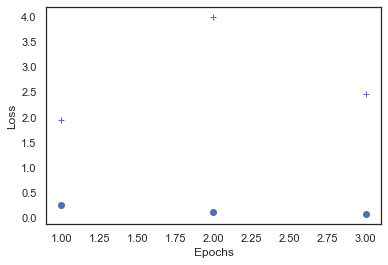

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

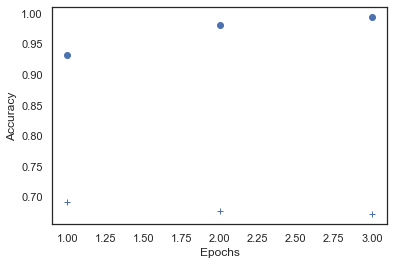

In [30]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Fully Connected Model
Neurons in a fully connected layer have full connections to all activations in the previous layer, 
as seen in regular Neural Networks. Adding another Dense Layer to model.

In [31]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [32]:
fc = get_fc_model()
fc.optimizer._lr=0.01

In [33]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
10800/10800 [==============================] - 197s 18ms/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 1.2626 - val_accuracy: 0.8126


# Convolutional Neural Network
CNNs are extremely efficient for images.

### Construction of the convolutionnal model
It is now time to construct our model.

Deep learning models are made of different convolutionnal, maxpooling and dense layers :

1) Convolutions (Conv2D function)
Convultions are the first layers of a convolutionnal neural network. It consists of multiple kernels (also called feature detectors or filters) which are put on the image so as to obtain an array by matrix multiplication, called feature map or convolved feature. If multiple kernels are applied, the results consists of a new dimension called strides. We won't have to choose which kernels should be applied to the image, Keras will automatically test multiple kernels.

Exemple of a kernel applied to 9 pixels and resulting in one. Kernels are first inverted in order to avoid self dependence. Then we apply a matrix multiplication :
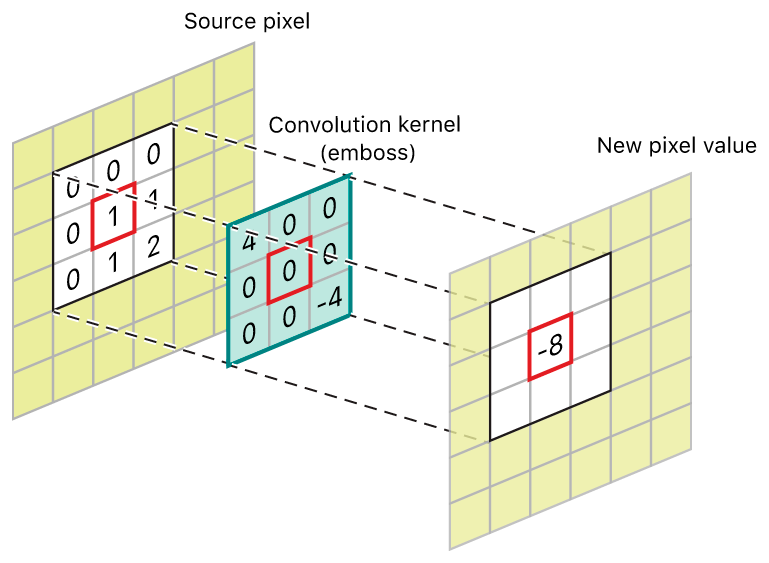

2) Maxpooling (MaxPool2D function)
Max Pooling select the higher value of a subset of size (h,H) and stride (s,S) so as to sub-sampling (reduces the number of parameters). It makes the detection of features invariant to scale or orientation changes and control overfitting..

3) Flattenning (Flatten function)
Makes an any-dimensional array a 1D list so as to be taken into input in dense layers

4) Dense / fully connected layers (Dense function)
Fully connected neurons layer

### Activation functions
Activation functions take the output of a neuron and transform it through a function.
- softmax : Softmax converts a real vector to a vector of categorical probabilities.
- relu : Applies the rectified linear unit activation function. They allow a faster training compared to the sigmoid and tanh functions, being lighter.


In [34]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(128,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [35]:
model= get_cnn_model()
model.optimizer._lr=0.01

In [36]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n,callbacks=[learning_rate_reduction])

Epoch 1/1
10800/10800 [==============================] - 1854s 172ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 1.3769 - val_accuracy: 0.9717


C:\Users\fbhug\.conda\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


# Improve Model Performance

## Data Augmentation

It is a technique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

Different data aumentation techniques are as follows:

- Cropping
- Rotating
- Scaling
- Translating
- Flipping

#### Random Rotations
Sometimes images in your sample data may have varying and different rotations in the scene.
You can train your model to better handle rotations of images by artificially and randomly
rotating images from your dataset during training by setting the rotation range argument.

#### Random Shifts
Objects in your images may not be centered in the frame. They may be off-center in a variety
of different ways. You can train your deep learning network to expect and currently handle
off-center objects by artificially creating shifted versions of your training data. Keras supports
separate horizontal and vertical random shifting of training data by the width shift range
and height shift range arguments.

Rather than performing the operations on your entire image dataset in memory, the API is
designed to be iterated by the deep learning model fitting process, creating augmented image
data for you just-in-time. This reduces your memory overhead, but adds some additional time
cost during model training.

The data generator itself is in fact an iterator, returning batches of image samples when
requested. We can configure the batch size and prepare the data generator and get batches of
images by calling the flow() function.



In [37]:
# gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                                height_shift_range=0.08, zoom_range=0.08)
# batches = gen.flow(X_train, y_train, batch_size=64)
# val_batches = gen.flow(X_val, y_val, batch_size=64)

In [38]:
gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

We can make use of the data generator. We call the fit generator() function and pass in the data generator and the
desired length of an epoch as well as the total number of epochs on which to train.

In [39]:
model.optimizer._lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n, callbacks=[learning_rate_reduction])

Epoch 1/1
10800/10800 [==============================] - 1204s 112ms/step - loss: 0.0516 - accuracy: 0.9832 - val_loss: 0.1374 - val_accuracy: 0.9641


In [40]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus


tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


# Improved Model 

As expected others have improved their models and had better scores. As such, I made some adjustment to improve my model and
score.

Firstly, I modified my model and add additional layer of convolution and furthermore, I used different technique of data 
augmentation and also increased the epochs to 10. Below are details of the models:

## Data Augmentation

I tried different techniques of data augmentation, and below is the one where I got the best score.

In [ ]:
gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

I have tried different models to improve my score, below is the one with which I achieved my best score

In [41]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.25),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.25),
        BatchNormalization(axis=1),
        Convolution2D(128,(2,2), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(128,(2,2), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)       

In [42]:
model= get_bn_model()
model.optimizer._lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n, callbacks=[learning_rate_reduction])

Epoch 1/10
10800/10800 [==============================] - 2814s 261ms/step - loss: 0.1560 - accuracy: 0.9496 - val_loss: 0.1761 - val_accuracy: 0.9635
Epoch 2/10


C:\Users\fbhug\.conda\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10800/10800 [==============================] - 3151s 292ms/step - loss: 0.0446 - accuracy: 0.9850 - val_loss: 0.2119 - val_accuracy: 0.9728
Epoch 3/10
10800/10800 [==============================] - 3147s 291ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.2332 - val_accuracy: 0.9772
Epoch 4/10
10800/10800 [==============================] - 3152s 292ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0566 - val_accuracy: 0.9779
Epoch 5/10
10800/10800 [==============================] - 3234s 299ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.2146 - val_accuracy: 0.9784
Epoch 6/10
10800/10800 [==============================] - 3206s 297ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.3121 - val_accuracy: 0.9774
Epoch 7/10
10800/10800 [==============================] - 3171s 294ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0011 - val_accuracy: 0.9766
Epoch 8/10
10800/10800 [==============================] - 3155s 292ms/step - loss: 0.0128 - accuracy: 0.9

# Submitting Predictions to Kaggle

We now train the best model on the entire augmented dataset :

In [43]:
model.optimizer._lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=10)

Epoch 1/10
12000/12000 [==============================] - 4503s 375ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 2/10
12000/12000 [==============================] - 3577s 298ms/step - loss: 0.0024 - accuracy: 0.9992
Epoch 3/10
12000/12000 [==============================] - 3403s 284ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 4/10
12000/12000 [==============================] - 3259s 272ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 5/10
12000/12000 [==============================] - 3274s 273ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 6/10
12000/12000 [==============================] - 3432s 286ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 7/10
12000/12000 [==============================] - 3272s 273ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 8/10
12000/12000 [==============================] - 3266s 272ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 9/10
12000/12000 [==============================] - 3280s 273ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 10/10
12000/1

In [45]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"Id": list(range(1,len(predictions)+1)),
                         "Category": predictions})
submissions.to_csv("submission10.csv", index=True, header=True)

# Kaggle score = 0.98733
